## Model Selection

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats

warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
ds = pd.read_csv("Dataset-Unicauca-Version2-87Atts.csv",nrows=50_000)
ds.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698,41178,762.555556,1230.348220,5133.0,1,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1,0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0,107,53.500000,75.660426,107.0,0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY


In [3]:
ds.drop(['Flow.ID','Bwd.PSH.Flags','Fwd.PSH.Flags','Fwd.URG.Flags','Bwd.URG.Flags','FIN.Flag.Count',
         'SYN.Flag.Count','RST.Flag.Count','PSH.Flag.Count','ACK.Flag.Count','URG.Flag.Count','CWE.Flag.Count','ECE.Flag.Count',
        'Fwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Bwd.Avg.Bytes.Bulk','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bulk.Rate'
         ,'ProtocolName'
        ],axis=1, inplace=True)

In [4]:
outlier_columns = ['Flow.Duration',
                   'Total.Fwd.Packets','Total.Backward.Packets',
                   'Total.Length.of.Fwd.Packets','Total.Length.of.Bwd.Packets',
                   'Fwd.Packet.Length.Max','Fwd.Packet.Length.Min',
                   'Fwd.Packet.Length.Mean','Fwd.Packet.Length.Std',
                   'Bwd.Packet.Length.Max','Bwd.Packet.Length.Min',
                   'Bwd.Packet.Length.Mean','Bwd.Packet.Length.Std',
                   'Flow.Bytes.s','Flow.Packets.s','Flow.IAT.Mean',
                   'Flow.IAT.Std','Flow.IAT.Max','Flow.IAT.Min',
                   'Fwd.IAT.Total','Fwd.IAT.Mean','Fwd.IAT.Std',
                   'Fwd.IAT.Max','Fwd.IAT.Min','Bwd.IAT.Total',
                   'Bwd.IAT.Mean','Bwd.IAT.Std','Bwd.IAT.Max',
                   'Bwd.IAT.Min','Fwd.Header.Length','Bwd.Header.Length',
                   'Fwd.Packets.s','Bwd.Packets.s','Min.Packet.Length',
                   'Max.Packet.Length','Packet.Length.Mean',
                   'Packet.Length.Std','Packet.Length.Variance',
                   'Down.Up.Ratio','Average.Packet.Size',
                   'Avg.Fwd.Segment.Size','Avg.Bwd.Segment.Size',
                   'Fwd.Header.Length.1','Subflow.Fwd.Packets',
                   'Subflow.Fwd.Bytes','Subflow.Bwd.Packets',
                   'Subflow.Bwd.Bytes','Init_Win_bytes_forward',
                   'Init_Win_bytes_backward','act_data_pkt_fwd',
                   'Active.Mean','Active.Std','Active.Max','Active.Min',
                   'Idle.Mean','Idle.Std','Idle.Max','Idle.Min',
]

In [5]:
ds = ds[(np.abs(stats.zscore(ds[outlier_columns])) < 4).all(axis=1)]

In [6]:
ds.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.00,0.000000,1.0,1,0,0.000000,0.000000,0.0,0,40,0,2.000000e+06,0.000000,6,6,6.0,0.000000,0.000000,0,9.000000,6.000000,0.000000,40,2,12,0,0,490,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.00,0.000000,0.0,0,107,53.500000,75.660426,107.0,0,32,96,4.608295e+03,13824.884793,0,0,0.0,0.000000,0.000000,3,0.000000,0.000000,0.000000,32,1,0,3,0,888,490,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.00,25758.502350,54313.0,0,0,0.000000,0.000000,0.0,0,100,0,6.404673e+01,0.000000,6,529,267.5,286.458898,82058.700000,0,321.000000,215.200000,0.000000,100,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131
6,192.168.72.43,55963,10.200.7.7,3128,6,26/04/201711:11:17,104443,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.030227e+04,4.787300e+01,26110.750000,31559.206152,63644.0,0,104443.0,26110.75,31559.206152,63644.0,0,0,0.000000,0.000000,0.0,0,100,0,4.787300e+01,0.000000,6,529,267.5,286.458898,82058.700000,0,321.000000,215.200000,0.000000,100,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131
7,192.168.10.47,51848,10.200.7.6,3128,6,26/04/201711:11:17,11002,3,12,232,3664,226,0,77.333333,128.784057,3628,0,305.333333,1046.372898,3.541174e+05,1.363388e+03,785.857143,2099.118418,7865.0,0,10012.0,5006.00,4043.236575,7865.0,2147,10788,980.727273,2880.864908,9625.0,0,72,300,2.726777e+02,1090.710780,0,3628,243.5,904.250555,817669.066667,4,259.733333,77.333333,305.333333,72,3,232,12,3664,8192,245,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,130


## Data engineering
Missing data imputation

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
# ds['ProtocolName'] = le.fit_transform(ds['ProtocolName'])
ds['Label'] = le.fit_transform(ds['Label'])
ds['Destination.IP'] = le.fit_transform(ds['Destination.IP'])
ds['Source.IP'] = le.fit_transform(ds['Source.IP'])
ds['Timestamp'] = le.fit_transform(ds['Timestamp'])  

In [9]:
display(ds.sample(15))

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol
33421,10,47669,1376,443,6,167,121401,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.647433e+01,121401.000000,0.000000,121401.0,121401,0.0,0.000000,0.000000,0.0,0,0,0.000000,0.000000,0.0,0,32,32,8.237164e+00,8.237164,0,0,0.000000,0.000000,0.000000e+00,1,0.000000,0.000000,0.000000,32,1,0,1,0,490,29,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0,91
32623,13,3128,743,49258,6,165,37,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.243243e+05,5.405405e+04,37.000000,0.000000,37.0,37,37.0,37.000000,0.000000,37.0,37,0,0.000000,0.000000,0.0,0,40,0,5.405405e+04,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,9.000000,6.000000,0.000000,40,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,7
40103,87,52865,22,3128,6,191,24455,10,42,324,64428,288,0,32.400000,89.853214,4096,0,1534.000000,1022.419894,2.647802e+06,2.126355e+03,479.509804,1000.896226,5016.0,0,24455.0,2717.222222,1767.557904,5066.0,25,16255,396.463415,972.950438,4560.0,0,236,876,4.089143e+02,1717.440196,0,4096,1221.735849,1097.767948,1.205094e+06,4,1245.230769,32.400000,1534.000000,236,10,324,42,64428,8192,490,7,20,0.0,0.0,0,0,0.0,0.0,0,0,0,147
24799,8,48584,890,443,6,134,301431,17,9,1884,4647,1448,0,110.823529,348.929655,1448,0,516.333333,700.524982,2.166665e+04,8.625523e+01,12057.240000,28966.131060,92022.0,0,301431.0,18839.437500,36536.774132,96170.0,0,199553,24944.125000,42902.868301,96638.0,0,360,188,5.639765e+01,29.857579,0,1448,241.888889,515.241865,2.654742e+05,0,251.192308,110.823529,516.333333,360,17,1884,9,4647,5840,282,16,20,0.0,0.0,0,0,0.0,0.0,0,0,0,91
46336,9,58550,1607,443,6,210,60907,1,2,0,31,0,0,0.000000,0.000000,31,0,15.500000,21.920310,5.089727e+02,4.925542e+01,30453.500000,42885.319172,60778.0,129,0.0,0.000000,0.000000,0.0,0,129,129.000000,0.000000,129.0,129,32,64,1.641847e+01,32.836948,0,31,7.750000,15.500000,2.402500e+02,2,10.333333,0.000000,15.500000,32,1,0,2,31,758,2387,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0,91
43230,11,3128,535,51410,6,200,1276,6,4,36,89,6,6,6.000000,0.000000,46,6,22.250000,19.737865,9.796238e+04,7.836991e+03,141.777778,243.318607,695.0,0,1163.0,232.600000,485.626194,1100.0,0,581,193.666667,192.593700,397.0,14,120,80,4.702194e+03,3134.796238,6,46,11.909091,13.568011,1.840909e+02,0,13.100000,6.000000,22.250000,120,6,36,4,89,296,252,5,20,0.0,0.0,0,0,0.0,0.0,0,0,0,7
900,9,34023,1460,80,6,5,202824,6,7,2084,618,1042,0,347.333333,538.086486,309,0,88.285714,150.776561,1.332189e+04,6.409498e+01,16902.000000,58277.999335,201959.0,0,610.0,122.000000,256.330841,580.0,0,202673,33778.833333,82391.608452,201959.0,0,208,240,2.958230e+01,34.512681,0,1042,193.000000,376.318605,1.416157e+05,1,207.846154,347.333333,88.285714,208,6,2084,7,618,14600,911,2,32,0.0,0.0,0,0,0.0,0.0,0,0,0,7
13820,13,3128,527,53976,6,81,216,4,0,553,0,531,6,138.250000,261.840123,0,0,0.000000,0.000000,2.560185e+06,1.851852e+04,72.000000,123.842642,215.0,0,216.0,72.000000,123.842642,215.0,0,0,0.000000,0.000000,0.0,0,80,0,1

# Modelling
# Класифікація

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

Визначення мети стовпців та їх характеристик

In [11]:
ds.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.S

In [12]:
y_column = 'L7Protocol' # target variable
X_columns = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.Size',
       'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min', 'Label',
       ]
X = ds[X_columns]
y = ds[y_column]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
reg_log = LogisticRegression(max_iter=100_000)
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.82      0.83      0.82      4550
          40       0.51      0.39      0.44       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.00      0.00      0.00        86
          91       0.32      0.21      0.25      1335
         114       0.00      0.00      0.00         1
         119       0.46      0.15      0.22        81
         120       0.00      0.00      0.00        32
         121       0.50      0.05      0.08        22
         122       0.00      0.00      0.00        65
         124       0.54      0.03      0.05       553
         125       0.00      0.00      0.00        66
         126       0.33      0.80      0.46      2120
         130       0.32      0.13      0.19      1049
         131       0.36      0.19      0.25      1557
         142       1.00    

In [15]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.45      0.97      0.62      4550
          40       0.00      0.00      0.00       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.00      0.00      0.00        86
          91       0.65      0.02      0.04      1335
         114       0.00      0.00      0.00         1
         119       0.00      0.00      0.00        81
         120       0.00      0.00      0.00        32
         121       0.00      0.00      0.00        22
         122       0.00      0.00      0.00        65
         124       0.81      0.02      0.05       553
         125       0.00      0.00      0.00        66
         126       0.45      0.52      0.48      2120
         130       0.58      0.04      0.07      1049
         131       0.57      0.02      0.03      1557
         142       0.00    

In [16]:

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.69      0.02      0.03      4550
          40       0.10      1.00      0.17       101
          60       0.01      1.00      0.03         1
          64       0.00      0.82      0.01        11
          68       0.00      0.00      0.00        47
          70       0.04      0.02      0.03        86
          91       0.07      0.00      0.00      1335
         114       0.00      0.00      0.00         1
         119       0.30      0.32      0.31        81
         120       0.00      0.00      0.00        32
         121       0.01      0.14      0.01        22
         122       0.04      0.12      0.06        65
         123       0.00      0.00      0.00         0
         124       0.31      0.07      0.11       553
         125       0.01      0.02      0.01        66
         126       0.41      0.03      0.05      2120
         130       0.40      0.00      0.00      1049
         131       0.29    

In [17]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.58      0.78      0.66      4550
          40       0.00      0.00      0.00       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.03      0.02      0.02        86
          91       0.18      0.18      0.18      1335
         114       0.00      0.00      0.00         1
         119       0.00      0.00      0.00        81
         120       0.00      0.00      0.00        32
         121       0.00      0.00      0.00        22
         122       0.00      0.00      0.00        65
         123       0.00      0.00      0.00         0
         124       0.00      0.00      0.00       553
         125       0.00      0.00      0.00        66
         126       0.28      0.15      0.20      2120
         130       0.23      0.58      0.33      1049
         131       0.37    

In [18]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.82      0.91      0.87      4550
          40       0.86      0.97      0.91       101
          60       0.00      0.00      0.00         1
          64       0.36      0.36      0.36        11
          68       0.48      0.21      0.29        47
          70       0.27      0.23      0.25        86
          91       0.53      0.60      0.56      1335
         114       0.00      0.00      0.00         1
         119       0.51      0.52      0.52        81
         120       0.43      0.28      0.34        32
         121       0.75      0.14      0.23        22
         122       0.09      0.03      0.05        65
         124       0.46      0.40      0.43       553
         125       0.07      0.03      0.04        66
         126       0.62      0.68      0.65      2120
         130       0.57      0.54      0.55      1049
         131       0.62      0.46      0.53      1557
         142       0.71    

In [19]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.93      0.93      0.93      4550
          40       0.98      0.99      0.99       101
          60       0.00      0.00      0.00         1
          64       0.55      0.55      0.55        11
          68       0.62      0.45      0.52        47
          70       0.49      0.56      0.52        86
          91       0.88      0.87      0.87      1335
         114       0.00      0.00      0.00         1
         119       0.77      0.81      0.79        81
         120       0.41      0.41      0.41        32
         121       0.60      0.27      0.37        22
         122       0.60      0.46      0.52        65
         123       0.00      0.00      0.00         0
         124       0.62      0.63      0.63       553
         125       0.34      0.30      0.32        66
         126       0.82      0.83      0.82      2120
         130       0.76      0.75      0.76      1049
         131       0.76    

In [20]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 20)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.89      0.97      0.93      4550
          40       1.00      1.00      1.00       101
          60       0.00      0.00      0.00         1
          64       0.71      0.45      0.56        11
          68       0.73      0.23      0.35        47
          70       0.87      0.40      0.54        86
          91       0.83      0.90      0.86      1335
         114       0.00      0.00      0.00         1
         119       0.81      0.78      0.79        81
         120       0.67      0.31      0.43        32
         121       1.00      0.23      0.37        22
         122       0.60      0.09      0.16        65
         124       0.73      0.54      0.62       553
         125       0.50      0.15      0.23        66
         126       0.78      0.86      0.82      2120
         130       0.77      0.83      0.80      1049
         131       0.81      0.70      0.75      1557
         142       0.80    

In [28]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.90      0.97      0.94      4550
          40       1.00      0.99      1.00       101
          60       0.00      0.00      0.00         1
          64       0.50      0.36      0.42        11
          68       0.57      0.34      0.43        47
          70       0.76      0.56      0.64        86
          91       0.89      0.87      0.88      1335
         114       0.00      0.00      0.00         1
         119       0.81      0.74      0.77        81
         120       0.50      0.44      0.47        32
         121       0.79      0.50      0.61        22
         122       0.34      0.22      0.26        65
         123       0.00      0.00      0.00         0
         124       0.86      0.49      0.62       553
         125       0.57      0.38      0.45        66
         126       0.79      0.87      0.83      2120
         130       0.77      0.82      0.79      1049
         131       0.79    

Найкращі результати досягнуті моделями DecisionTreeClassifier ,GradientBoostingClassifier. Обидві моделі мають високу точність (accuracy) та хороший F1-score (макро-середнє).

## Feature importances

In [29]:
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Виведення Рейтингу ознак
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Source.Port (0.191468)
2. Destination.IP (0.179236)
3. Source.IP (0.098911)
4. Destination.Port (0.087503)
5. Init_Win_bytes_backward (0.048595)
6. Init_Win_bytes_forward (0.031842)
7. Timestamp (0.025872)
8. Fwd.Packet.Length.Max (0.024158)
9. Fwd.IAT.Max (0.021473)
10. Avg.Fwd.Segment.Size (0.018877)
11. Subflow.Fwd.Bytes (0.014540)
12. Fwd.Packet.Length.Std (0.014081)
13. Total.Length.of.Fwd.Packets (0.011736)
14. Subflow.Bwd.Packets (0.010827)
15. Bwd.IAT.Max (0.010376)
16. Bwd.Packets.s (0.009440)
17. Bwd.Packet.Length.Mean (0.009119)
18. Fwd.IAT.Min (0.008782)
19. Flow.IAT.Max (0.008747)
20. Flow.Duration (0.007761)
21. Bwd.Packet.Length.Max (0.007627)
22. Flow.Bytes.s (0.007289)
23. Flow.IAT.Min (0.007161)
24. Total.Fwd.Packets (0.006901)
25. Fwd.IAT.Total (0.006734)
26. Fwd.Packet.Length.Mean (0.006253)
27. Average.Packet.Size (0.006002)
28. Fwd.Packets.s (0.005732)
29. Fwd.Packet.Length.Min (0.005535)
30. Packet.Length.Mean (0.005445)
31. Flow.Packets.s (0.

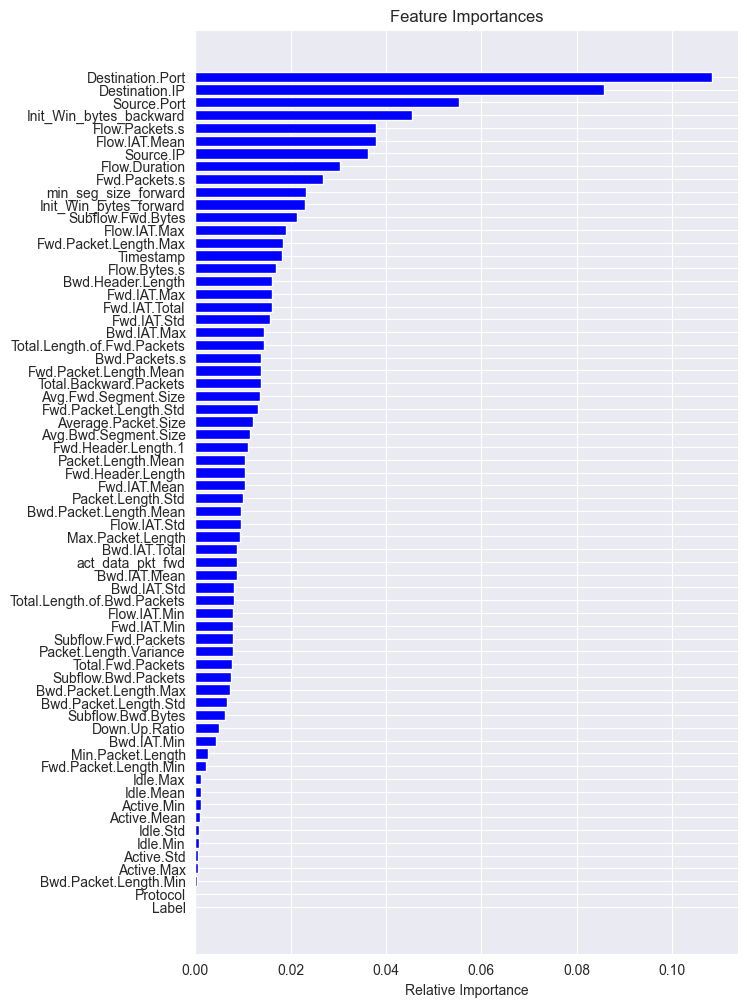

In [30]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
from sklearn.inspection import permutation_importance

#  DecisionTreeClassifier
imps = permutation_importance(dt_classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Source.Port (0.373356)
2. Destination.IP (0.291450)
3. Source.IP (0.264111)
4. Destination.Port (0.129402)
5. Init_Win_bytes_forward (0.077457)
6. Init_Win_bytes_backward (0.071698)
7. Fwd.Packet.Length.Max (0.066861)
8. Avg.Fwd.Segment.Size (0.066715)
9. Fwd.IAT.Max (0.065097)
10. Fwd.Header.Length.1 (0.055521)
11. Total.Length.of.Fwd.Packets (0.050959)
12. Subflow.Fwd.Bytes (0.047561)
13. Fwd.Packet.Length.Std (0.044132)
14. Bwd.IAT.Max (0.027518)
15. Bwd.Packets.s (0.025204)
16. Timestamp (0.024573)
17. Flow.Duration (0.020675)
18. Fwd.Packet.Length.Mean (0.020480)
19. Fwd.Packet.Length.Min (0.020157)
20. Bwd.Packet.Length.Mean (0.019089)
21. Bwd.Packet.Length.Max (0.018572)
22. Bwd.IAT.Total (0.018167)
23. Subflow.Bwd.Packets (0.016889)
24. Packet.Length.Std (0.016371)
25. Flow.IAT.Std (0.016323)
26. Max.Packet.Length (0.016129)
27. act_data_pkt_fwd (0.015983)
28. Fwd.IAT.Mean (0.015886)
29. Flow.IAT.Max (0.014786)
30. Packet.Length.Mean (0.014398)
31. Fwd.Packe

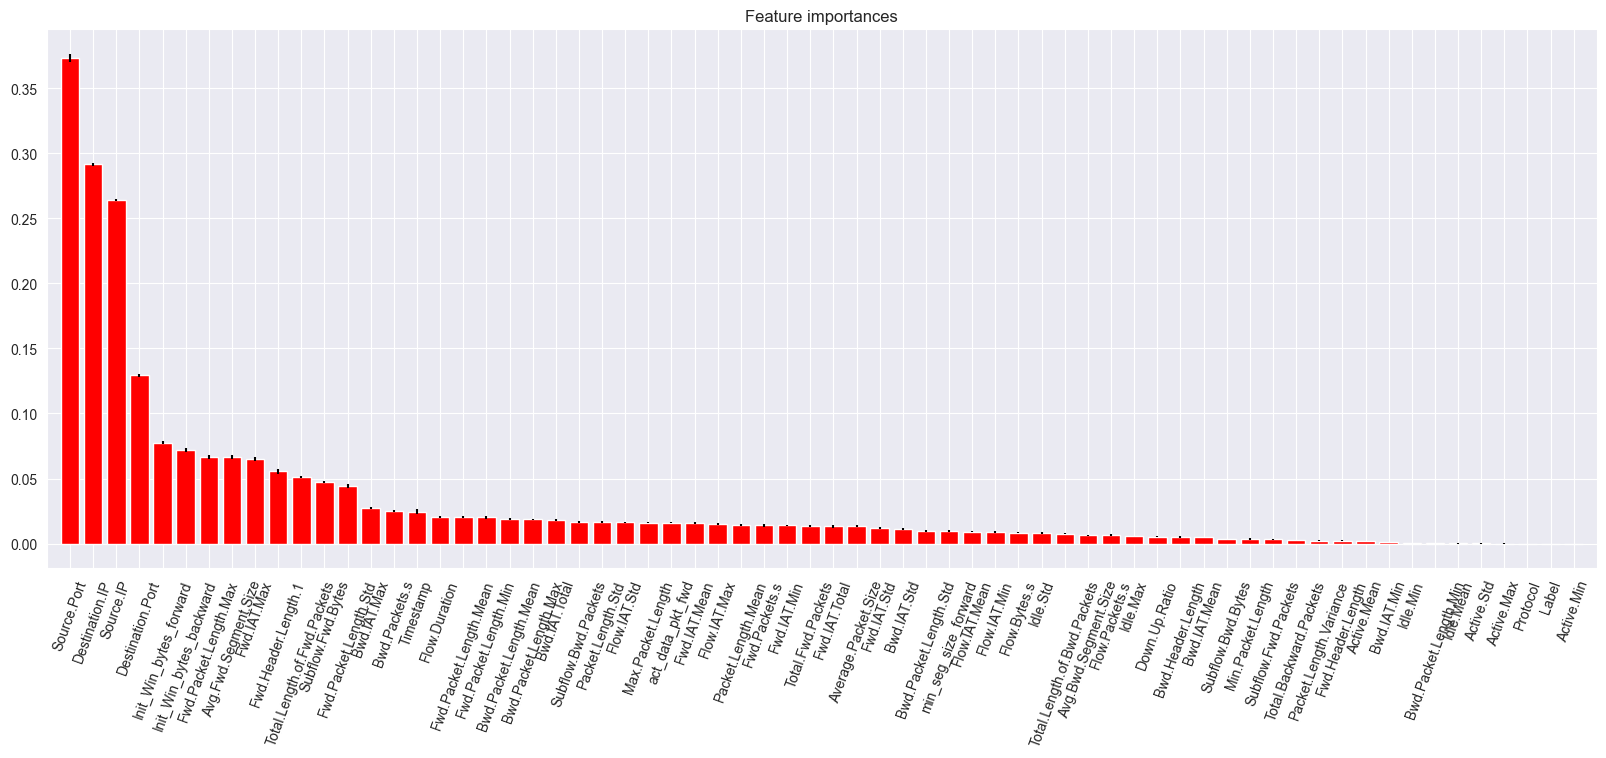

In [32]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()